# Reading Acknowledge Files
august 2016, Stef Mientki.

The Biopac hardware stores the recordings in their own file format acq-files.
These files contains both the sampled data and the metadata.
You can buy the ACKAPI from Biopac, which makes it possible to easily read these acq-files with any program language you like.
So here we're going to try to read the files with Python.
The Python (and probably all other languages) interface is fairly simple and for someone who has experience in interfacing to DLL's it should not take more than an hour from scratch, to see the first results. 

The basic Python interface to the Biopac DLL is made by Robbert Mientki. This basic interface was extended with a class for an even more easier use. In this interactive note we're going to use the highest level of interface that's the class library.

There are a few other notes (planned):
- The Basic Python Interface
- Reading Acq-Files with MatLab

This is our first contact with Jupyter Notebook (and we've neither any experience with IPython Notebook), so probably some things could have be done in a more professional way.

### ToDo
- conversion of bytes to string
- filename as pure string possible
- better plotting: legends, different Y-axis, choose which cahnnels to view
- detect 32/64 bit dll
- partial read of very large files
- read the journal

### Getting the paths correct
First of all we need to be sure that our program can find the right DLL.
There exists a 32-bit DLL and a 64-bit DLL, both with the same name.
If we put the right DLL in the same directory as our program, we'll be sure that the right DLL will be used.
In the orginal package you can select the right DLL through a logical path.\
In our case it's only possible to identify the DLL-type by it's size: 32bit = 84kB and 64bit = 92kB.


In [1]:
%cd C:\D\Data_Python_25\Biopac_FileRead_64
%ls

C:\D\Data_Python_25\Biopac_FileRead_64
 Volume in drive C has no label.
 Volume Serial Number is E436-514B

 Directory of C:\D\Data_Python_25\Biopac_FileRead_64

05-08-2016  18:30    <DIR>          .
05-08-2016  18:30    <DIR>          ..
05-08-2016  18:30    <DIR>          __pycache__
16-11-2015  16:22            94.208 acqfile.dll
05-08-2016  21:18             8.329 Biopac_AcqFile_support.py
05-08-2016  18:30               304 module1.py
               3 File(s)        102.841 bytes
               3 Dir(s)  162.720.559.104 bytes free



### Initialize MatPlotLib
Initialize MatPlotLib, to get an interactive plot in Jupyter notebook.
Of course this has nothing to do with the actual reading of acq-files, but we must be sure that these are the first Python statements as in this notebook we want to show some interactive plots of the data.

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

### Start including the support library

In [8]:
# This will import all structures and interfaces of the DLL
#from Biopac_AcqFile_support import __doc__, Biopac_File
import Biopac_AcqFile_support

### Let's see what this library has to offer

In [9]:
print ( Biopac_AcqFile_support.__doc__ )   


# Once you've created an Biopac-File-Object
  Filename = b"C:\E\_Biopac\acq_opnamen\4Channel.acq"
  MyFile = Biopac_File ( Filename )
# You can get information from that Biopac-File-Object,
# through the following methods:
  MyFile.Opened ()    # returns True or False



### Make our File Object

In [10]:
Filename = b"C:\\E\\_Biopac\\acq_opnamen\\4Channel.acq"

MyFile = Biopac_AcqFile_support.Biopac_File ( Filename )
print ( MyFile.Opened )

True


### Get the MetaData
Now the file seems to be opened, we get all kinds of information from the file.

In [11]:
MyFile.MetaData ()


File MetaData : C:\E\_Biopac\acq_opnamen\4Channel.acq
Number of Channels : 4
SampleRate         : 200.0 Hz
Number of Markers  : 3
Journal Length     : 4400
Version            : 124


### Get the MetaData of each channel

In [12]:
MyFile.Channel_MetaData ()


Channel MetaData, Channel : 0
Label  : Derivación II ECG
Units  : mV
Scale  : 6.103515625e-05
Offset : 0.0

Channel MetaData, Channel : 1
Label  : Pulso
Units  : mV
Scale  : 3.0517578125e-05
Offset : 0.0

Channel MetaData, Channel : 2
Label  : Estetoscopio 
Units  : mV
Scale  : 0.000152587890625
Offset : 0.0

Channel MetaData, Channel : 3
Label  : Respiración 
Units  : Litros
Scale  : 0.0001220703125
Offset : 0.0


### Get the markers

In [13]:
MyFile.Get_Markers ()

Marker 0 : -1 
Marker 1 : 704 Inhalación profunda
Marker 2 : 2296 Después del Ejercicio


### Get the Journal

In [14]:
Journal = MyFile.Get_Journal ()
print ( Journal )

Journal : <Biopac_AcqFile_support.c_wchar_Array_50000 object at 0x000000000702F448>
(50000, <Biopac_AcqFile_support.c_wchar_Array_50000 object at 0x000000000702F448>)


### Get the DATA

In [15]:
Data = MyFile.Get_Data ()
print ( Data )

[[-0.00213623  0.75582886  0.21591187 -0.25990234]
 [ 0.00445557  0.68521118  0.17684937 -0.23037109]
 [ 0.00616455  0.66934204 -0.16433716 -0.22209961]
 ..., 
 [-0.02209473 -0.17214966  0.01678467 -0.10653809]
 [-0.01593018 -0.14886475 -0.03189087 -0.10787109]
 [-0.00866699 -0.12246704  0.00091553 -0.10889648]]


### And finally ... Show the DATA

<IPython.core.display.Javascript object>


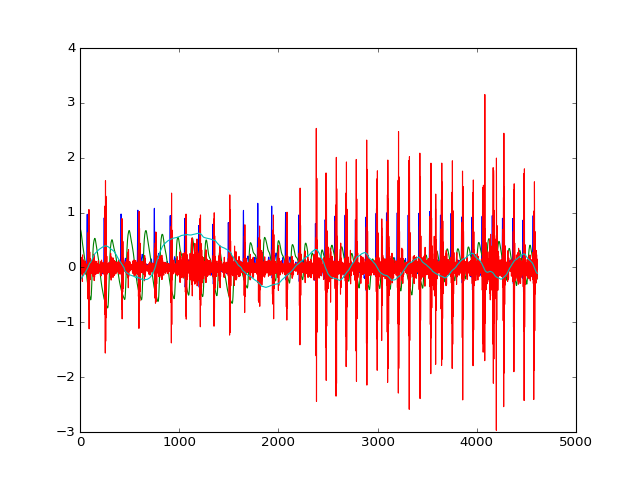

In [16]:
MyFile.Plot ()

### The END